### 문제: 마우스로 사각형을 그려서 crop하여 저장해보자

In [2]:
from IPython.display import Image 

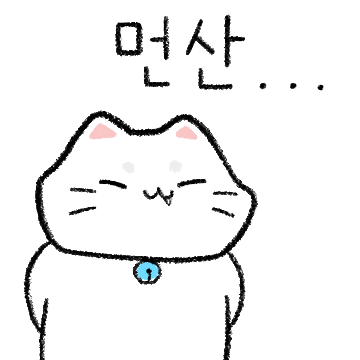

In [3]:
Image("06_냥바타콘_19_먼산.png")

``` 어려워보여도 해보장..```

### 가장 간단하게 구현
```
참고 사이트: "https://inhovation97.tistory.com/57"
```

In [ ]:
import cv2, numpy as np

img = cv2.imread('cat.bmp')

x,y,w,h = cv2.selectROI('img', img, False)
if w and h:
    roi = img[y:y+h, x:x+w]
    cv2.imshow('cropped', roi)                   # ROI 지정 영역을 새창으로 표시
    cv2.moveWindow('cropped', 0, 0)              # 새창을 화면 측 상단으로 이동
    cv2.imwrite('cropped2.jpg', roi)  # ROI 영역만 파일로 저장
    
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 다른 방식으로 구현 + json저장하기
```
Callback 함수 응용+ 여러번 그리기 + 그린 좌표및 정보를 json에 저장
```

In [ ]:
import cv2
import numpy as np
from datetime import datetime
import random
import pandas as pd
from functools import reduce
isDragging = False                      # 마우스 드래그 상태 저장 
x0, y0, w, h = -1,-1,-1,-1              # 영역 선택 좌표 저장
blue, red = (135,206,235),(0,0,255)# 색상 값
Data_frame=pd.DataFrame()


def onMouse(event,x,y,flags,param):     # 마우스 이벤트 핸들 함수
    global isDragging, x0, y0, img,Data_frame# 전역변수 참조
    color=(random.randint(0,255),random.randint(0,255),random.randint(0,255))
    time_value=str(datetime.now()).replace(" ","").replace(".","_").replace(":","_").replace("-","_")
    type(color[0])
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 마우스 버튼 다운, 드래그 시작 
        isDragging = True
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE:  # 마우스 움직임 
        if isDragging:                  # 드래그 진행 중
            img_draw = img.copy()       # 사각형 그림 표현을 위한 이미지 복제
            cv2.rectangle(img_draw, (x0, y0), (x, y), color, 2) # 드래그 진행 영역 표시
            cv2.imshow('img', img_draw) # 사각형 표시된 그림 화면 출력
    elif event == cv2.EVENT_LBUTTONUP:  # 왼쪽 마우스 버튼 업 
        if isDragging:                  # 드래그 중지
            isDragging = False          
            w = x - x0                  # 드래그 영역 폭 계산
            h = y - y0                  # 드래그 영역 높이 계산
            #print("x:%d, y:%d, w:%d, h:%d" % (x0, y0, w, h))
            if w > 0 and h > 0:         # 폭과 높이가 양수이면 드래그 방향이 옳음
                img_draw = img.copy()   # 선택 영역에 사각형 그림을 표시할 이미지 복제
                # 선택 영역 표시
                cv2.rectangle(img_draw, (x0, y0), (x, y), color, 2) 
                cv2.imshow('img', img_draw) # 빨간 사각형 그려진 이미지 화면 출력
                roi = img[y0:y0+h, x0:x0+w] # 원본 이미지에서 선택 영역만 ROI로 지정 
                cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
                print("color : ",color)
                data_new=pd.DataFrame([{'x1':x0,'x2':x0+w,'y1':y0,'y2':y0+h,'color_r':color[0],'color_g':color[1],'color_b':color[2]}])
                Data_frame=Data_frame.append(data_new,ignore_index=True)
                cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
                path_name="./"+time_value+".jpg"# 저장할 파일이름
                cv2.imwrite(path_name, roi)   # ROI 영역만 파일로 저장
                print("finished")
            else:
                cv2.imshow('img', img)  # 드래그 방향이 잘못된 경우 사각형 그림이 없는 원본 이미지 출력
                print("Error: 좌측 상단에서 우측 하단으로 영역을 드래그 하세요.")

img = cv2.imread('cat.bmp')#파일명 입력
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse) # 마우스 이벤트 등록
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == ord('c'): #c를 누르는 순간 지금까지 그린 사각형들의 정보를 저장함. 
        cv2.destroyAllWindows()
        print (Data_frame)
        Data_frame.to_json('test.json',orient='table')
        break

### 구현과정에서 생긴 에러


### datetime error
```
(base) PS D:\image> py .\image.py .\cat.bmp
Traceback (most recent call last):
  File "D:\image\image.py", line 7, in <module>
    time_value=datetime.now().strftime('%c').replace(" ","").replace(".","_")
module 'datetime' has no attribute 'now'
```
* datetime은 기본적으로 type, value가 따로 묶여서 저장된다. str으로 형변환 해주자

### name error
```
Traceback (most recent call last):
  File "D:\image\image.py", line 76, in <module>
    cv2.imwrite(name, roi)
cv2.error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:692: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'
```
* 구체적으로는 string형태와 확장자가 없어서 생긴 에러이다. 제목형태를 맞춰주자

### type error
```
UnboundLocalError                         Traceback (most recent call last)
Cell In[21], line 15, in onMouse(event, x, y, flags, param)
     13 color=(random.randint(0,255),random.randint(0,255),random.randint(0,255))
     14 #print (color)
---> 15 str =''.join(map(str,color))
     16 if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 마우스 버튼 다운, 드래그 시작 
     17     isDragging = True

UnboundLocalError: cannot access local variable 'str' where it is not associated with a value
```
* localvalue에 접근 할수 없는 에러이다
* 정확히는 str 함수랑 변수명이 str로 같아서 생긴 에러이다.